In [ ]:
#Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import pandas as pd
import csv

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
#Load TBI data
df_tbi = pd.read_csv('/content/drive/MyDrive/NeuroBeat_GitHub_Repo/Data/Processed/TRAIN_tbi_matrix.csv')
df_tbi = df_tbi.drop(['File'], axis=1)
#df_tbi = df_tbi.drop(['Gender'], axis=1)

In [ ]:
#Load Healthy Part 1 Data
df_healthy_1 = pd.read_csv('/content/drive/MyDrive/NeuroBeat_GitHub_Repo/Data/Processed/TRAIN_cebsdb_matrix.csv')
df_healthy_1 = df_healthy_1.drop(['File'], axis=1)
#df_healthy_1 = df_healthy_1.drop(['Gender'], axis=1)

In [ ]:
#Load Health Part 2 Data
df_healthy_2 = pd.read_csv('/content/drive/MyDrive/NeuroBeat_GitHub_Repo/Data/Processed/TRAIN_rr_healthy_matrix.csv')
df_healthy_2 = df_healthy_2.drop(['File'], axis=1)
#df_healthy_2 = df_healthy_2.drop(['Gender'], axis=1)

In [ ]:
#Load Test Data (Collected Data Samples)
df_athlete = pd.read_csv('/content/drive/MyDrive/NeuroBeat_GitHub_Repo/Data/Processed/TEST_collected_HRV_samples.csv')

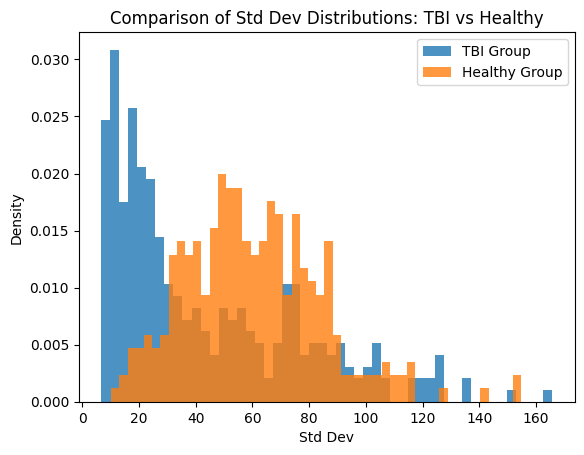

In [ ]:
# Concatenating two healthy datasets into one DataFrame
temp = pd.concat([df_healthy_1, df_healthy_2])  # Combine the two DataFrames containing healthy data for comparison

# Plotting both histograms in the same plot for comparison
plt.hist(df_tbi['Std Dev'], bins=50, density=True, alpha=0.8, label='TBI Group')  # Plot the histogram for TBI group
# 'alpha=0.5' makes the bars semi-transparent to better visualize overlap
plt.hist(temp['Std Dev'], bins=50, density=True, alpha=0.8, label='Healthy Group')  # Plot the histogram for healthy group

# Adding a title and labels
plt.title('Comparison of Std Dev Distributions: TBI vs Healthy')
plt.xlabel('Std Dev')
plt.ylabel('Density')
plt.legend()  # Add a legend to differentiate between TBI and healthy groups
plt.show()  # Display the combined plot

# This plot allows visual comparison of the distribution of 'Std Dev' between TBI and healthy groups.
# Overlapping histograms make it easier to see similarities or differences between the two groups.


In [ ]:
#Feature selection details can be found in our pdf report

# Concatenate the TBI and healthy datasets into a single DataFrame
df_full = pd.concat([df_tbi, df_healthy_1, df_healthy_2])  # Combine TBI, healthy dataset 1, and healthy dataset 2 into a single DataFrame

# Drop the 'Coeff of Var' column from the combined DataFrame
df_full = df_full.drop(['Coeff of Var'], axis=1)  # Remove the 'Coeff of Var' (Coefficient of Variation) column from df_full

# Drop the 'Gender' column from the combined DataFrame
df_full = df_full.drop(['Gender'], axis=1)  # Remove the 'Gender' column from df_full

# Drop the 'Coeff of Var' column from the athlete DataFrame
df_athlete = df_athlete.drop(['Coeff of Var'], axis=1)  # Remove the 'Coeff of Var' column from df_athlete

# Drop the 'Gender' column from the athlete DataFrame
df_athlete = df_athlete.drop(['Gender'], axis=1)  # Remove the 'Gender' column from df_athlete


In [ ]:
#visualization of data struct
df_full

,Age,BPM,Mean,Range,IQR,Variance,Std Dev,Classification
0,19,94.705511,634.751908,260.0,20.0,635.943540,25.217921,1
1,19,96.979587,619.070344,240.0,40.0,600.065396,24.496232,1
2,19,97.277510,616.792104,420.0,40.0,1026.353448,32.036752,1
3,19,98.042008,612.936409,320.0,60.0,1317.811418,36.301672,1
4,19,94.850805,637.386892,700.0,40.0,1883.235092,43.396257,1
...,...,...,...,...,...,...,...,...
270,39,85.906084,698.437143,187.0,55.0,1443.623192,37.995042,0
271,39,92.035833,651.920000,165.0,39.0,842.239314,29.021360,0
272,39,92.644879,647.634286,165.0,32.0,951.174824,30.841122,0
273,39,96.171900,623.882857,132.0,62.0,1037.440563,32.209324,0


In [ ]:
#visualization of collected HRV samples
df_athlete

,Age,BPM,Mean,Range,IQR,Variance,Std Dev,Classification
0,22,69.570667,862.432432,592,104,6860.101290,82.825728,0
1,22,70.051890,856.507937,632,184,12537.066260,111.969042,0
2,22,71.059570,844.361991,456,142,10534.457200,102.637504,0
3,22,83.362672,719.746606,584,48,3153.890543,56.159510,0
4,22,85.719740,699.955457,560,48,3299.810933,57.443981,0
5,22,85.127500,704.825112,552,54,2720.036679,52.153971,0
6,22,69.696461,860.875846,552,80,5517.210320,74.277926,0
7,22,67.733865,885.819820,648,96,5754.814382,75.860493,0
8,22,79.483298,754.875576,632,112,10477.408480,102.359213,0
9,22,71.310791,841.387387,512,104,5654.147228,75.194064,0


In [ ]:
#Understanding Data Metric
df_full['IQR'].mean()

65.16164725457566

<Axes: >

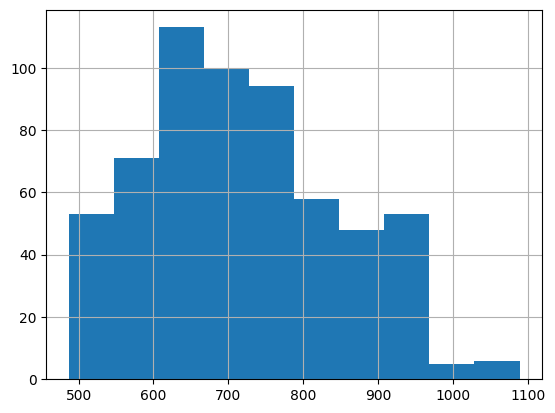

In [ ]:
#Understanding Data Metric
df_full['Mean'].hist()

In [ ]:
import random
random.seed(0)
indices = np.arange(601)
train_indices = np.random.choice(indices, 450, replace=False)
df_train = df_full[df_full.index.isin(train_indices)]
df_test = df_full[~df_full.index.isin(train_indices)]
df_test = pd.concat([df_test, df_athlete])
df_train[df_train.Classification == 1].shape

(232, 8)

In [ ]:
df_train = df_full
df_test = df_athlete

In [ ]:
# Import the random module and set the seed for reproducibility
import random
random.seed(0)  # Setting the seed ensures that the random choices are reproducible

# Create an array of indices from 0 to 600
indices = np.arange(601)  # Assuming df_full has at least 601 rows

# Randomly select 450 unique indices from the array without replacement
train_indices = np.random.choice(indices, 450, replace=False)
# These indices represent the rows that will be used for training
# 'replace=False' ensures that the same index is not selected multiple times

# Create the training DataFrame using the randomly selected indices
df_train = df_full[df_full.index.isin(train_indices)]
# Select rows from df_full whose indices are in the train_indices list

# Create the test DataFrame using the indices that are not in the training set
df_test = df_full[~df_full.index.isin(train_indices)]
# Select rows from df_full whose indices are NOT in the train_indices list

# Add the df_athlete dataset to the test DataFrame
df_test = pd.concat([df_test, df_athlete])
# This means the athlete data will always be part of the test set

# Get the shape (number of rows and columns) of the subset of the training data where 'Classification' is equal to 1
df_train[df_train.Classification == 1].shape
# This provides the count of rows where the 'Classification' column has the value 1

(226, 8)

## Logistic Regression

In [ ]:
# Initialize accuracy variable to accumulate accuracy scores
accuracy = 0

# Loop to run the process 10 times
for i in range(10):
    # Import the random module and set the seed for reproducibility in each iteration
    import random
    random.seed(0)  # Setting the seed ensures the same random sample is selected each time

    # Create an array of indices from 0 to 600
    indices = np.arange(601)  # Assuming df_full has at least 601 rows

    # Randomly select 450 unique indices from the array without replacement
    train_indices = np.random.choice(indices, 450, replace=False)
    # These indices represent the rows that will be used for training

    # Create the training DataFrame using the randomly selected indices
    df_train = df_full[df_full.index.isin(train_indices)]  # Select rows from df_full for training
    # Create the test DataFrame using the remaining indices
    df_test = df_full[~df_full.index.isin(train_indices)]  # Select rows from df_full for testing

    # Create target labels (y_train, y_test) and remove the 'Classification' column from training and testing feature matrices (x_train, x_test)
    y_test = df_test['Classification']  # Extract 'Classification' column from df_test as target labels
    y_train = df_train['Classification']  # Extract 'Classification' column from df_train as target labels
    # Remove the 'Classification' column to leave only the feature columns
    x_test = df_test.drop(['Classification'], axis=1)  # Drop 'Classification' from df_test to form feature matrix
    x_train = df_train.drop(['Classification'], axis=1)  # Drop 'Classification' from df_train to form feature matrix

    # Fit a logistic regression model on the training data
    reg = LogisticRegression(
        dual=False, tol=0.0001, C=1.0, fit_intercept=True,
        intercept_scaling=1, class_weight=None, solver='lbfgs',
        max_iter=500, multi_class='auto', verbose=0, warm_start=False, n_jobs=None,
        l1_ratio=None
    ).fit(x_train, y_train)  # Train logistic regression model using training data (x_train, y_train)

    # Predict labels for the test set
    y_pred = reg.predict(x_test)  # Use the trained model to make predictions on the test data

    # Calculate the accuracy of the predictions and accumulate it
    accuracy += accuracy_score(y_test, y_pred)  # Add the accuracy score to the cumulative accuracy variable

# At the end of the loop, 'accuracy' will contain the sum of accuracy scores from all 10 iterations

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

In [ ]:
print(accuracy/10)

0.8763962034060553


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8928571428571429

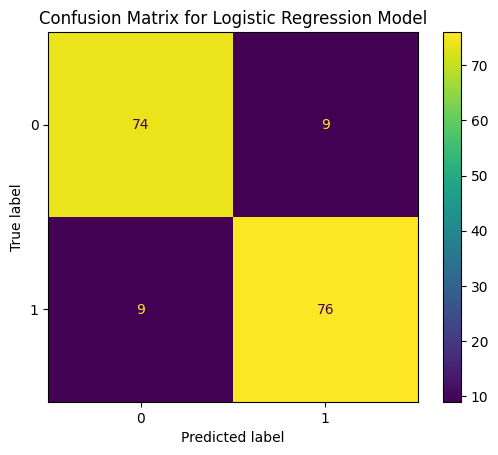

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix and plot it
matrix = confusion_matrix(y_test, y_pred)  # Generate the confusion matrix from true labels and predicted labels
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)  # Create a ConfusionMatrixDisplay object
disp.plot()  # Plot the confusion matrix

# Add a title to the plot
plt.title('Confusion Matrix for Logistic Regression Model')  # Set the title for the confusion matrix plot
plt.show()  # Display the plot


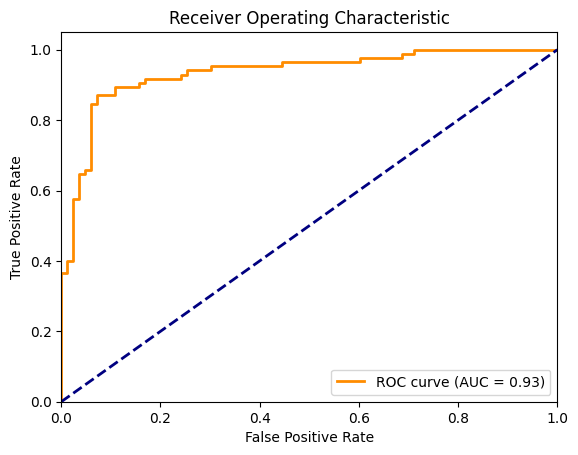

In [ ]:
# predict probabilities of positive class
y_pred_prob = reg.predict_proba(x_test)[:, 1]

# calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Average accuracy for each model over 10 iterations:
Logistic Regression: 0.85
Random Forest: 0.94
SVM: 0.72
KNN: 0.79


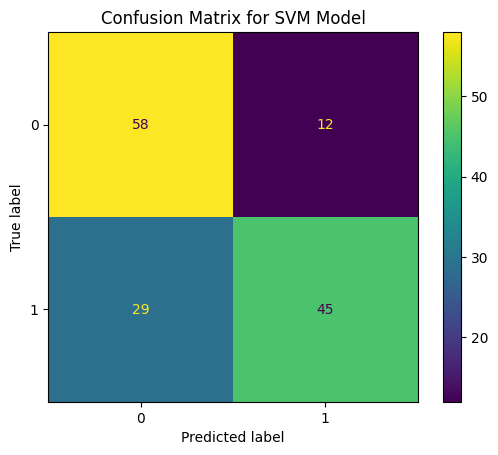

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Initialize accuracy dictionary to store average accuracies for each model
accuracy_dict = {'Logistic Regression': 0, 'Random Forest': 0, 'SVM': 0, 'KNN': 0}

# Loop to run the process 10 times for each model
for i in range(10):
    # Set random seed and create train/test split indices
    random.seed(0)
    indices = np.arange(601)
    train_indices = np.random.choice(indices, 450, replace=False)

    # Create training and testing sets
    df_train = df_full[df_full.index.isin(train_indices)]
    df_test = df_full[~df_full.index.isin(train_indices)]

    # Extract target labels and feature matrices
    y_test = df_test['Classification']
    y_train = df_train['Classification']
    x_test = df_test.drop(['Classification'], axis=1)
    x_train = df_train.drop(['Classification'], axis=1)

    # Logistic Regression
    reg = LogisticRegression(solver='lbfgs', max_iter=500).fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    accuracy_dict['Logistic Regression'] += accuracy_score(y_test, y_pred)

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=0).fit(x_train, y_train)
    y_pred_rf = rf.predict(x_test)
    accuracy_dict['Random Forest'] += accuracy_score(y_test, y_pred_rf)

    # Support Vector Machine (SVM)
    svm = SVC(kernel='rbf', probability=True).fit(x_train, y_train)
    y_pred_svm = svm.predict(x_test)
    accuracy_dict['SVM'] += accuracy_score(y_test, y_pred_svm)

    # K-Nearest Neighbors (KNN)
    knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
    y_pred_knn = knn.predict(x_test)
    accuracy_dict['KNN'] += accuracy_score(y_test, y_pred_knn)

# Calculate average accuracy for each model
for model in accuracy_dict:
    accuracy_dict[model] /= 10

# Print the average accuracy for each model
print("Average accuracy for each model over 10 iterations:")
for model, acc in accuracy_dict.items():
    print(f"{model}: {acc:.2f}")

# Plot the confusion matrix for one of the models (e.g., SVM)
matrix = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()

# Add a title to the confusion matrix plot
plt.title('Confusion Matrix for SVM Model')
plt.show()
